In [2]:
import numpy as np
from numpy.random import default_rng
import math
from math import ceil, log
from numpy import e
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [3]:
def psi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*t*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*t*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*(delta**2 + 2*delta*chi + epsilon**2)*e**(t*squareroot(epsilon, delta, chi)/2) \
    /((delta + 2*chi)*squareroot(epsilon, delta, chi))
    
def psi2(t, c1, c2, c3, c4, epsilon, delta, chi):
    return -c1*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c2*epsilon*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) - \
    c2*t*squareroot(epsilon, delta, chi)*e**(-t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c3*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*epsilon*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi) + \
    c4*t*squareroot(epsilon, delta, chi)*e**(t*squareroot(epsilon, delta, chi)/2)/(delta + 2*chi)
    
def phi1(t, c1, c2, c3, c4, epsilon, delta, chi):
    return c1*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c2*t*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c3*e**(t*squareroot(epsilon, delta, chi)/2) + \
    c4*t*e**(t*squareroot(epsilon, delta, chi)/2)

def phi2(t, c2, c4, epsilon, delta, chi):
    return c2*e**(-t*squareroot(epsilon, delta, chi)/2) + \
    c4*e**(t*squareroot(epsilon, delta, chi)/2)

def check_sqrt(epsilon, delta, chi):
    return -delta**2 - 2*delta*chi - epsilon**2 < 0

def squareroot(epsilon, delta, chi):
    result = -delta**2 - 2*delta*chi - epsilon**2
    return math.sqrt(result)

def func(xp):
    return (abs(psi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(psi2(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi1(xp[0], xp[1], xp[2], xp[3], xp[4], xp[5], xp[6], xp[7])))**2 + \
            (abs(phi2(xp[0], xp[2], xp[4], xp[5], xp[6], xp[7])))**2

In [27]:
# [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip]
x0= [9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551]
#[9.999999, -8, 0.4, 0.8, 0.1, 0.7, 1.01, -0.8]

dimension = 8
x=x0

intervals = [0.0000001, 0.05, 0.05, 0.05, 0.05, 0.2, 0.0001, 0.02]
num_points = 20# points for each param
func_vals = [0] * (num_points**2)
z_count = 0

data_1 = [0] * num_points #len 20
data_2 = [0] * num_points #len 20
print(len(data_2))
# do all iterations in one program
# for param1 in range(dimension-1):
#     num_axs = 7 - param1
#     for param2 in range(num_axs):

#treat as just c1 and c2
for i in range(num_points): #t
    data_1[i] = x0[1] + i*intervals[1];
    for j in range(num_points): 
        data_2[j] = x0[2] + j*intervals[2]; #redundant
        func_vals[z_count] = func([9.99997769055193, data_1[i], data_2[j], 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429911912247, -0.8494864484591551])
        z_count = z_count+1
    print(z_count)
        
        #do the check,  if invalid increment, replace index/point and do new obj func value
            #only need to do if params include epsilon, delta, or chi
#for loop in range(total_loop):
print(func_vals)

20
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
[0.7670691278323817, 1.238808887276082, 2.0519891235590024, 3.206609836681146, 4.702671026642505, 6.540172693443088, 8.719114837082891, 11.239497457561923, 14.101320554880163, 17.304584129037618, 20.84928818003431, 24.735432707870217, 28.96301771254535, 33.532043194059696, 38.442509152413244, 43.69441558760605, 49.28776249963804, 55.222549888509256, 61.49877775421972, 68.11644609676938, 0.792576021931349, 1.2981218431069146, 2.1451081411216997, 3.333534915975708, 4.863402167668932, 6.73470989620138, 8.94745810157305, 11.501646783783944, 14.397275942834048, 17.63434557872337, 21.212855691451928, 25.13280628101969, 29.394197347426704, 33.997028890672894, 38.94130091075833, 44.22701340768298, 49.85416638144686, 55.82275983204995, 62.132793759492266, 68.78426816377379, 0.8214635297454658, 1.3608154126528964, 2.241607772399547, 3.4638406089854215, 5.0275139224105105, 6.932627712674823, 9.179181979778358, 11.76717

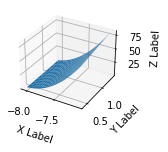

In [32]:
fig = plt.Figure(figsize=plt.figaspect(1/(7-i)))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])

#prep data
#x_vals, x_idx = np.unique(data[overall], return_inverse=True)
#y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
X, Y = np.meshgrid(np.array(data_1), np.array(data_2))
zs = np.array(func_vals)
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#print(z_array)
# print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
#ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
fig

In [15]:
figs = []
for i in range(7):
    figs.append(plt.Figure(figsize=plt.figaspect(1/(7-i))))

# data stores [t, c1p, c2p, c3p, c4p, epsilonp, deltap, chip, obj]

#  t,c1 ;  t,c2 ;  t,c3 ;  t,c4 ;  t, d ; t, e ;  t, x (7) - t
# c1,c2 ; c1,c3 ; c1,c4 ; c1, e ; c1, d ; c1, x        (6) - c1
# c2,c3 ; c2,c4 ; c2, e ; c2, d ; c2, x                (5) - c2
# c3,c4 ; c3, e ; c3, d ; c3, x                        (4) - c3
# c4, e ; c4, d ; c4, x                                (3) - c4
#  e, d ;  e, x                                        (2) - e
#  d, x                                                (1) - d

for overall in range(7):
    num_axs = 7 - overall
    for plot_count in range(num_axs):
        ax = figs[overall].add_subplot(1, num_axs, plot_count+1, projection='3d')
        #ax.scatter3D(data[overall], data[overall+plot_count+1], data[-1])
        
        #prep data
        #x_vals, x_idx = np.unique(data[overall], return_inverse=True)
        #y_vals, y_idx = np.unique(data[overall+plot_count+1], return_inverse=True)
        x, y = np.meshgrid(data[overall], data[overall+plot_count+1])
        print(x.shape)
        print(y.shape)
        #print(z_array)
        # print(y)
#        ax.plot_surface(x, y, z_array, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        ax.set_title('params ' + str(overall) + ' ' + str(overall+plot_count+1))
        #ax.set(xlabel=str(overall), ylabel=str(overall+plot_count+1))
    

24.843717064699256


In [25]:
func([9.99997769055193, -8.042455772869037, 0.4104156269769683, 0.7626971134550099, 0.12854464458518508, 0.775287951314912, 0.5104429, -0.8494864484591551])

1.584770375191498

In [5]:
func([9.99998057, -4.56026166, 0.22418289, 0.8, 0.1, 0.80661314, 0.50003705, -0.9])

ValueError: math domain error